In [48]:
# Code By Muhammad Abdullah Ijaz 
# Imports
from vpython import *
import numpy as np
import math
from scipy import optimize
from numpy import asarray, arange
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d

In [49]:
# Variables User can update

#Projectile
initial_pos = vector(0,0,0)
in_velocity = 100
radius_of_ball = 0.5
mass_of_ball = 2
area_of_ball = pi*radius_of_ball*radius_of_ball
theta = None   # Angle og projectile with respect to y axis
phi = None # Angle of projection with respect to z axis

#Enviroment
air_velocity = vector(5,0,-15)
air_density = 1.21
air_drag = 0.5

g = -9.8
Gravity = vector(0,g,0)

In [50]:
def funk(angle):
    t = 0
    dt = 0.01
    ball_pos = initial_pos 
    ball_velocity= vector(in_velocity*sin(angle[0])*sin(angle[1]), in_velocity*cos(angle[0]), in_velocity*cos(angle[1])*sin(angle[0]))
    while ball_pos.y >=0 or t < 0.2:
        relative_velocity = ball_velocity - air_velocity
        Force = Gravity*mass_of_ball - 0.5*air_drag*air_density*area_of_ball*mag2(relative_velocity)*(relative_velocity).hat
        accel = Force/mass_of_ball
        ball_velocity = ball_velocity + dt*accel
        ball_pos = ball_pos + ball_velocity*dt
        t = t+dt
        if ball_pos.y < 0:
                break
    ball_pos.y = 0
    Range = - mag(ball_pos)
    #print ("Range =" , ball_pos)
    return Range

In [51]:
def devt(angle):
    delta = 0.01*pi
    upper_theta = angle[0]+ delta
    lower_theta = angle[0]- delta
    
    upper = np.array([upper_theta, angle[1]])
    lower = np.array([lower_theta, angle[1]])
    
    upper_val = funk(upper)
    lower_val = funk(lower)
    
    grad =(upper_val - lower_val)/(2*delta)
    #print("Gradient =", grad)
    return grad

In [52]:
def devp(angle):
    delta = 0.01*pi
    
    upper_phi = angle[1]+ delta
    lower_phi = angle[1]- delta
    
    upper = np.array([angle[0], upper_phi])
    lower = np.array([angle[0], lower_phi])
    
    upper_val = funk(upper)
    lower_val = funk(lower)
    
    grad =(upper_val - lower_val)/(2*delta)
    #print("Gradient =", grad)
    return grad

In [53]:
def gradient_descent(tolerence, iterations_limit, learn_rate):
    
    anglet_list, anglep_list,dist_list = list(), list(), list()
    angle = np.array([0.2*pi,pi])
    index = 0
    #angle = 0.02*pi #random.randrange(1,4) *pi/10.0
    for i in range(iterations_limit):
        #print("Rang",func(theta))
        grad_t = devt(angle)
        delta_t = learn_rate* grad_t
        grad_p = devp(angle)
        delta_p = learn_rate* grad_p
        if abs(delta_t) <= tolerence and abs(delta_p) <= tolerence:
            break
        if abs(delta_t) > tolerence:
            angle[0] -= delta_t
        if abs(delta_p) > tolerence:
            angle[1] -= delta_p
        
        anglet_list.append(angle[0])
        anglep_list.append(angle[1])
        dist = -funk(angle)
        dist_list.append(dist)
        
        print('>%d f(%s, %s) = %.5f' % (i, angle[0], angle[1] , dist))
           
        #print ("Theta, Range = ", theta/pi, -funk(theta, phi, in_velocity))
    return [anglet_list,anglep_list,dist_list ,angle]

>0 f(0.6165521612547027, 3.131078461528235) = 70.36537
>1 f(0.6056059563205317, 3.1158274055919173) = 70.64530
>2 f(0.6056059563205317, 3.1011508464061692) = 70.71346
>3 f(0.6056059563205317, 3.086928952676082) = 70.77631
>4 f(0.6056059563205317, 3.0783156743346147) = 70.81282
>5 f(0.6056059563205317, 3.0699729111974854) = 70.84708
>6 f(0.6056059563205317, 3.0618928350138845) = 70.87922
>7 f(0.6056059563205317, 3.0540677826415243) = 70.90936
>8 f(0.6056059563205317, 3.0464902584477693) = 70.93762
>9 f(0.6056059563205317, 3.0391529360092706) = 70.96411
>10 f(0.5960870329856256, 3.032048659175976) = 71.06215
>11 f(0.5960870329856256, 3.0252299036721557) = 71.08503
>12 f(0.5960870329856256, 3.0186266080277915) = 71.10650
>13 f(0.5960870329856256, 3.012232300530038) = 71.12662
>14 f(0.5960870329856256, 3.006040672821111) = 71.14549


Optimum Theta =  0.18974039562528797 pi
Optimum Phi =  0.9568524644295334 pi
Maximum Range =  71.14548677832576 m


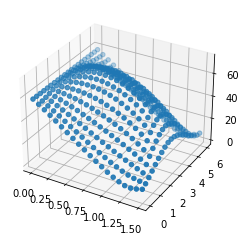

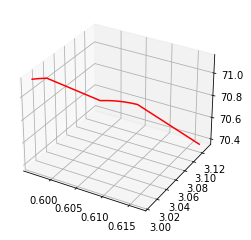

In [54]:
# Theta & Phi for maximum range

iterations_limit = 500

if air_drag == 0:
    tolerence = 0.008  # 00
    learn_rate = 0.0001

if air_drag == 0.5:
    tolerence = 0.006  # 00
    learn_rate = 0.002
    
#tolerence = 0.0001
#learn_rate = 0.002

anglet_list,anglep_list,dist_list, optimum = gradient_descent(tolerence, iterations_limit, learn_rate)


input_anglet,input_anglep, ouput_dist =  list(), list(), list()
for i in range(20):
    for j in range(20):
        angl = np.array([i*pi/40.0, j*pi/10.0])
        input_anglet.append(angl[0])
        input_anglep.append(angl[1])
        ouput_dist.append(-funk(angl))

fig = plt.figure()
# syntax for 3-D projection
ax = plt.axes(projection ='3d')

display(ax.scatter(input_anglet,input_anglep, ouput_dist, 'yellow'))


fig = plt.figure()
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
display(ax.plot3D(anglet_list, anglep_list, dist_list, 'red'))

#plt.show()
print("Optimum Theta = ", optimum[0]/pi, "pi")
print("Optimum Phi = ", optimum[1]/pi, "pi")
print("Maximum Range = ", -funk(optimum), "m")

In [55]:
#Scipy
angle = np.array([0.2*pi, pi])
optimum = optimize.minimize(funk, angle, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
print(optimum)

      fun: -70.28460335108183
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([-25.15233135,   5.25805187])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 191
      nit: 0
     njev: 61
   status: 2
  success: False
        x: array([0.62831853, 3.14159265])
